In [11]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
#Read the csv file
file_path = ("../Resources/parkinsons_disease_data.csv")
park_df = pd.read_csv(file_path)

In [13]:
park_df.dropna(axis=0, how='any')
park_df.head()
park_df["Ethnicity"] = park_df["Ethnicity"].astype(str)

In [14]:
park_df["Ethnicity"] = park_df["Ethnicity"].str.replace("0", "Caucasian")
park_df["Ethnicity"] = park_df["Ethnicity"].str.replace("1", "African American")
park_df["Ethnicity"] = park_df["Ethnicity"].str.replace("2", "Asian")
park_df["Ethnicity"] = park_df["Ethnicity"].str.replace("3", "Other")

In [15]:
park_df.drop(["DoctorInCharge"],axis = 1, inplace=True)
park_df.drop_duplicates()
park_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,3058,85,0,Other,1,19.619878,0,5.108241,1.380660,3.893969,...,29.181289,1.572427,1,0,0,0,0,0,0,0
1,3059,75,0,Caucasian,2,16.247339,1,6.027648,8.409804,8.513428,...,12.332639,4.787551,0,1,0,1,0,1,0,1
2,3060,70,1,Caucasian,0,15.368239,0,2.242135,0.213275,6.498805,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3,3061,52,0,Caucasian,0,15.454557,0,5.997788,1.375045,6.715033,...,21.304268,3.391288,1,1,1,0,0,0,1,1
4,3062,87,0,Caucasian,1,18.616042,0,9.775243,1.188607,4.657572,...,8.336364,3.200969,0,0,0,1,0,1,0,0


In [16]:
park_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis'],
      dtype='object')

Demographics 

In [17]:
# map gender
gender_map = {0: "Male", 1: "Female"}
park_df["Gender"] = park_df["Gender"].map(gender_map)

#create visual structure 
fig = px.box(
    park_df, 
    x='Diagnosis', 
    y='Age', 
    color='Gender', 
    facet_col='Ethnicity',  
    title='Parkinsons Diagnosis Distribution by Age, Gender, and Ethnicity',
    labels={
        'Age': 'Age', 
        'Gender': 'Gender', 
        'Ethnicity': 'Ethnicity'
    },
    category_orders={"Gender": ["Male", "Female"]} 
)

#update layout 
fig.update_layout(
    legend_title_text='Gender',
    legend=dict(
        itemsizing='constant',  
        title_font_size=12,
        font_size=12
    )
)

# add annotation 
fig.add_annotation(
    text="Diagnosis <br>0 - Non Diagnosis<br>1 - Diagnosis", 
    xref="paper", yref="paper",
    x=1.15, y=0.8,  
    showarrow=False,
    align="left",
    font=dict(size=11.5),
    bordercolor="white",
    borderwidth=0.6,
    bgcolor="white" 
)
# display figure
fig.show()


lifestyle Factors 

In [18]:
park_df['Diagnosis_numeric'] = park_df['Diagnosis']

# create variable for lifestyle factors 
lifestyle_factors = [
    "Smoking", "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality", 
    
]

# Separate male and female
male_df = park_df[park_df['Gender'] == 'Male']
female_df = park_df[park_df['Gender'] == 'Female']

# Calculate the averages by lifestyle factor for each diagnosis group by gender
male_averages = male_df[lifestyle_factors + ['Diagnosis_numeric']].groupby('Diagnosis_numeric').mean()
female_averages = female_df[lifestyle_factors + ['Diagnosis_numeric']].groupby('Diagnosis_numeric').mean()

# Reset index 
male_averages.reset_index(inplace=True)
female_averages.reset_index(inplace=True)

# xpert told me to do this to help with code 
male_long = pd.melt(male_averages, id_vars=['Diagnosis_numeric'], value_vars=lifestyle_factors, 
                    var_name='Lifestyle Factor', value_name='Average Score')

female_long = pd.melt(female_averages, id_vars=['Diagnosis_numeric'], value_vars=lifestyle_factors, 
                      var_name='Lifestyle Factor', value_name='Average Score')

male_long['Diagnosis_numeric'] = male_long['Diagnosis_numeric'].astype('category')
female_long['Diagnosis_numeric'] = female_long['Diagnosis_numeric'].astype('category')

# Bar chart male
male_fig = px.bar(
    male_long,
    x="Lifestyle Factor",  
    y="Average Score",  
    color="Diagnosis_numeric",  
    barmode="group",  
    title="Lifestyle Factor Averages Across Parkinson’s Diagnosis Groups (Males)",
    labels={'Average Score': 'Average Score', 'Lifestyle Factor': 'Lifestyle Factors'},
    text_auto=True,  
    color_discrete_map={  
        0: 'blue',  
        1: 'red'    
    }
)

# Update layout for male
male_fig.update_layout(
    title_x=0.5,
    yaxis=dict(title='Average Lifestyle Factor Scores'),
    xaxis=dict(title='Lifestyle Factors', tickangle=0),  
    barmode='group',  
    legend_title="Diagnosis",  
    legend=dict(
        title="Diagnosis",  
        traceorder="normal",  
        itemsizing='constant',  
        x=1.05,  
        y=1,  
        bgcolor="white",  
        borderwidth=1, 
        entrywidth=50  
    ),
)

# Update legend
male_fig.for_each_trace(lambda trace: trace.update(
    name='Non Diagnosis' if trace.name == '0' else 'Diagnosis'  
))

# display male chart
male_fig.show()

# Bar chart female
female_fig = px.bar(
    female_long,
    x="Lifestyle Factor",  
    y="Average Score",  
    color="Diagnosis_numeric",  
    barmode="group",  
    title="Lifestyle Factor Averages Across Parkinson’s Diagnosis Groups (Females)",
    labels={'Average Score': 'Average Score', 'Lifestyle Factor': 'Lifestyle Factors'},
    text_auto=True,  
    color_discrete_map={  
        0: 'blue', 
        1: 'red'    
    }
)

# Update layout for female 
female_fig.update_layout(
    title_x=0.5,
    yaxis=dict(title='Average Lifestyle Factor Scores'),
    xaxis=dict(title='Lifestyle Factors', tickangle=0),  
    barmode='group',  
    legend_title="Diagnosis",  
    legend=dict(
        title="Diagnosis",  
        traceorder="normal",  
        itemsizing='constant',  
        x=1.05,  
        y=1,  
        bgcolor="white",  
        borderwidth=1,  
        entrywidth=50  
    ),
)

# Update legend
female_fig.for_each_trace(lambda trace: trace.update(
    name='Non Diagnosis' if trace.name == '0' else 'Diagnosis'  
))

# display female chart
female_fig.show()


Medical History Factors 

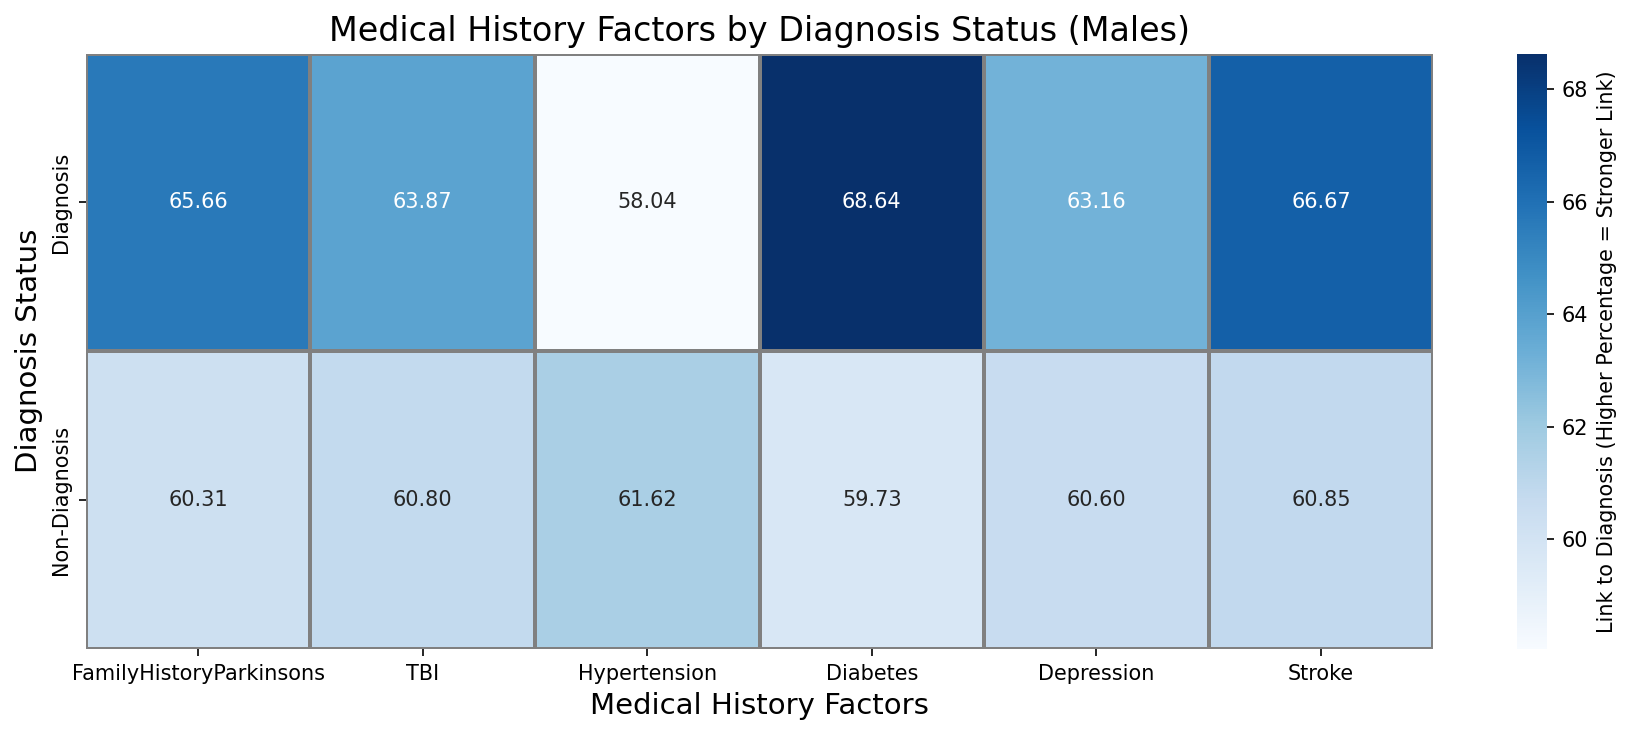

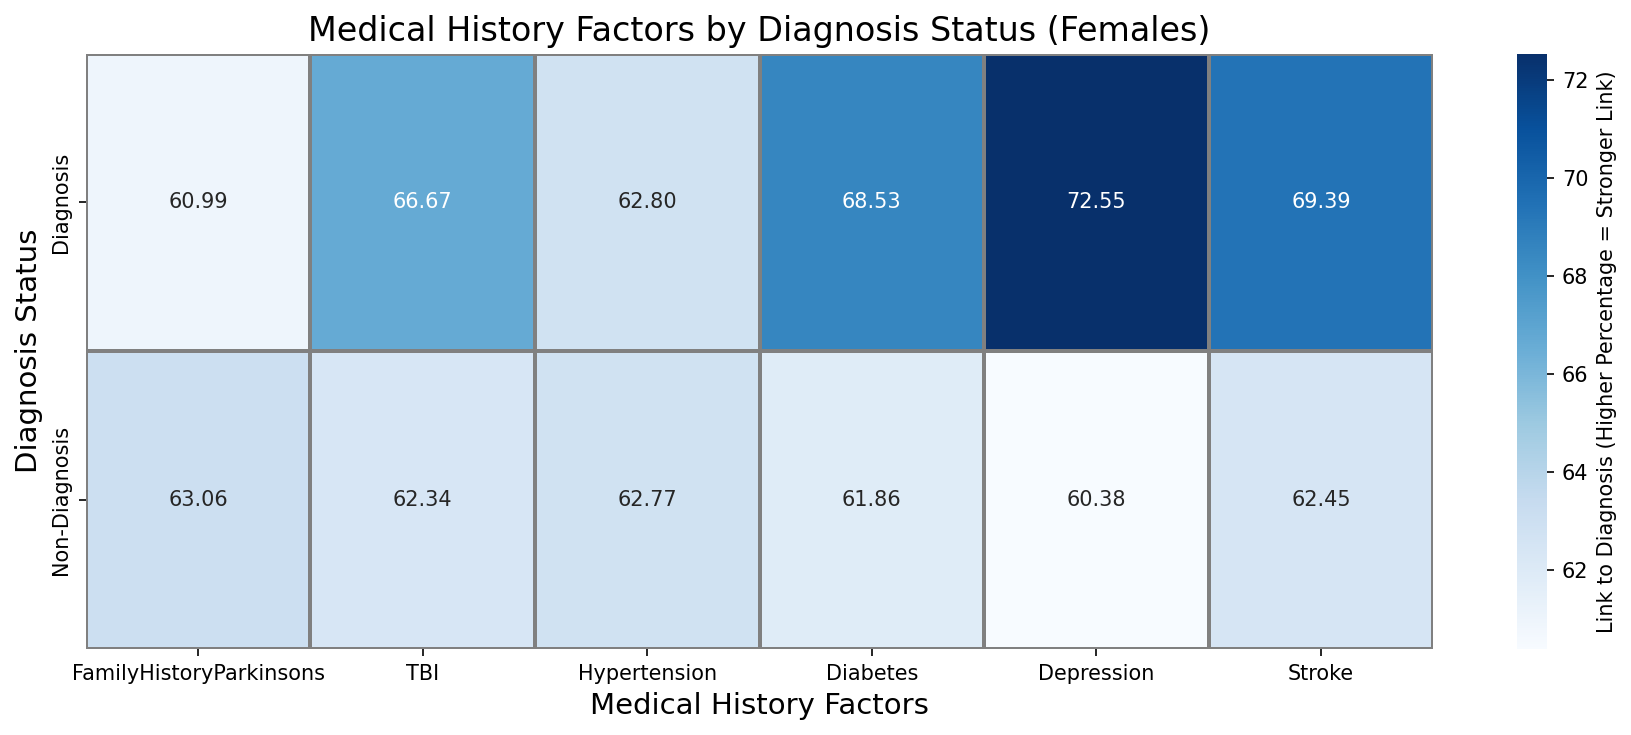

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Filter data by Gender
males_df = park_df[park_df['Gender'] == 'Male']
females_df = park_df[park_df['Gender'] == 'Female']

# Calculate percentages for males
males_percentage = {
    'FamilyHistoryParkinsons': [
        (males_df[males_df['FamilyHistoryParkinsons'] == 1]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100),
        (males_df[males_df['FamilyHistoryParkinsons'] == 0]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100)
    ],
    'TBI': [
        (males_df[males_df['TraumaticBrainInjury'] == 1]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100),
        (males_df[males_df['TraumaticBrainInjury'] == 0]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100)
    ],
    'Hypertension': [
        (males_df[males_df['Hypertension'] == 1]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100),
        (males_df[males_df['Hypertension'] == 0]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100)
    ],
    'Diabetes': [
        (males_df[males_df['Diabetes'] == 1]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100),
        (males_df[males_df['Diabetes'] == 0]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100)
    ],
    'Depression': [
        (males_df[males_df['Depression'] == 1]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100),
        (males_df[males_df['Depression'] == 0]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100)
    ],
    'Stroke': [
        (males_df[males_df['Stroke'] == 1]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100),
        (males_df[males_df['Stroke'] == 0]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100)
    ]
}

# Calculate percentages for females
females_percentage = {
    'FamilyHistoryParkinsons': [
        (females_df[females_df['FamilyHistoryParkinsons'] == 1]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100),
        (females_df[females_df['FamilyHistoryParkinsons'] == 0]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100)
    ],
    'TBI': [
        (females_df[females_df['TraumaticBrainInjury'] == 1]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100),
        (females_df[females_df['TraumaticBrainInjury'] == 0]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100)
    ],
    'Hypertension': [
        (females_df[females_df['Hypertension'] == 1]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100),
        (females_df[females_df['Hypertension'] == 0]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100)
    ],
    'Diabetes': [
        (females_df[females_df['Diabetes'] == 1]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100),
        (females_df[females_df['Diabetes'] == 0]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100)
    ],
    'Depression': [
        (females_df[females_df['Depression'] == 1]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100),
        (females_df[females_df['Depression'] == 0]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100)
    ],
    'Stroke': [
        (females_df[females_df['Stroke'] == 1]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100),
        (females_df[females_df['Stroke'] == 0]['Diagnosis'].value_counts(normalize=True).get(1, 0) * 100)
    ]
}

# Df for males and females
df_males = pd.DataFrame(males_percentage, index=['Diagnosis', 'Non-Diagnosis'])
df_females = pd.DataFrame(females_percentage, index=['Diagnosis', 'Non-Diagnosis'])

# Heatmap male
plt.figure(figsize=(12, 5), dpi=150)  
sns.heatmap(df_males, annot=True, cmap='Blues', cbar_kws={'label': 'Link to Diagnosis (Higher Percentage = Stronger Link)'}, fmt=".2f", linewidths=1, linecolor='gray')
plt.title('Medical History Factors by Diagnosis Status (Males)', fontsize=16)
plt.xlabel('Medical History Factors', fontsize=14)
plt.ylabel('Diagnosis Status', fontsize=14)
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

# Heatmap female 
plt.figure(figsize=(12, 5), dpi=150)  
sns.heatmap(df_females, annot=True, cmap='Blues', cbar_kws={'label': 'Link to Diagnosis (Higher Percentage = Stronger Link)'}, fmt=".2f", linewidths=1, linecolor='gray')
plt.title('Medical History Factors by Diagnosis Status (Females)', fontsize=16)
plt.xlabel('Medical History Factors', fontsize=14)
plt.ylabel('Diagnosis Status', fontsize=14)
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()


clinical assesmements

In [20]:
#create variable for clinical columns
clinical_columns = ['UPDRS', 'MoCA', 'FunctionalAssessment']  

# Box plots for clinical measures vs diagnosis
for col in clinical_columns:
    fig = px.box(
        park_df, 
        x='Diagnosis', 
        y=col, 
        color='Gender', 
        title=f'{col} Distribution by Parkinson’s Diagnosis',
        labels={col: col, 'Diagnosis': '(0)Non Diagnosis (1)Diagnosis'},
        category_orders={'Diagnosis': [0, 1]},
        color_discrete_map={'Male': 'blue', 'Female': 'pink'}
    )
    fig.update_layout(
        title=f'{col} Distribution by Parkinson’s Diagnosis',
        xaxis_title="Diagnosis: (0)Non Diagnosis (1)Diagnosis",
        yaxis_title=col,
        showlegend=True,
    )
    fig.show()

# Violin plots for symptoms vs diagnosis
symptom_columns = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability', 'SpeechProblems', 'SleepDisorders', 'Constipation']  

for col in symptom_columns:
    fig = px.violin(
        park_df, 
        y=col, 
        x='Diagnosis', 
        color='Diagnosis', 
        box=True, 
        points='all', 
        title=f'Distribution of {col} by Parkinson’s Diagnosis',
        labels={col: col, 'Diagnosis': '(0)Non Diagnosis (1)Diagnosis'},
        color_discrete_map={0: 'blue', 1: 'red'}
    )
    fig.update_layout(
        title=f'Distribution of {col} by Parkinson’s Diagnosis',
        xaxis_title="Diagnosis: (0)Non Diagnosis (1)Diagnosis",
        yaxis_title=col,
        showlegend=False
    )
    fig.show()
